In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
df = pd.read_excel("/Users/macuser/Downloads/Real estate valuation data set.xlsx")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


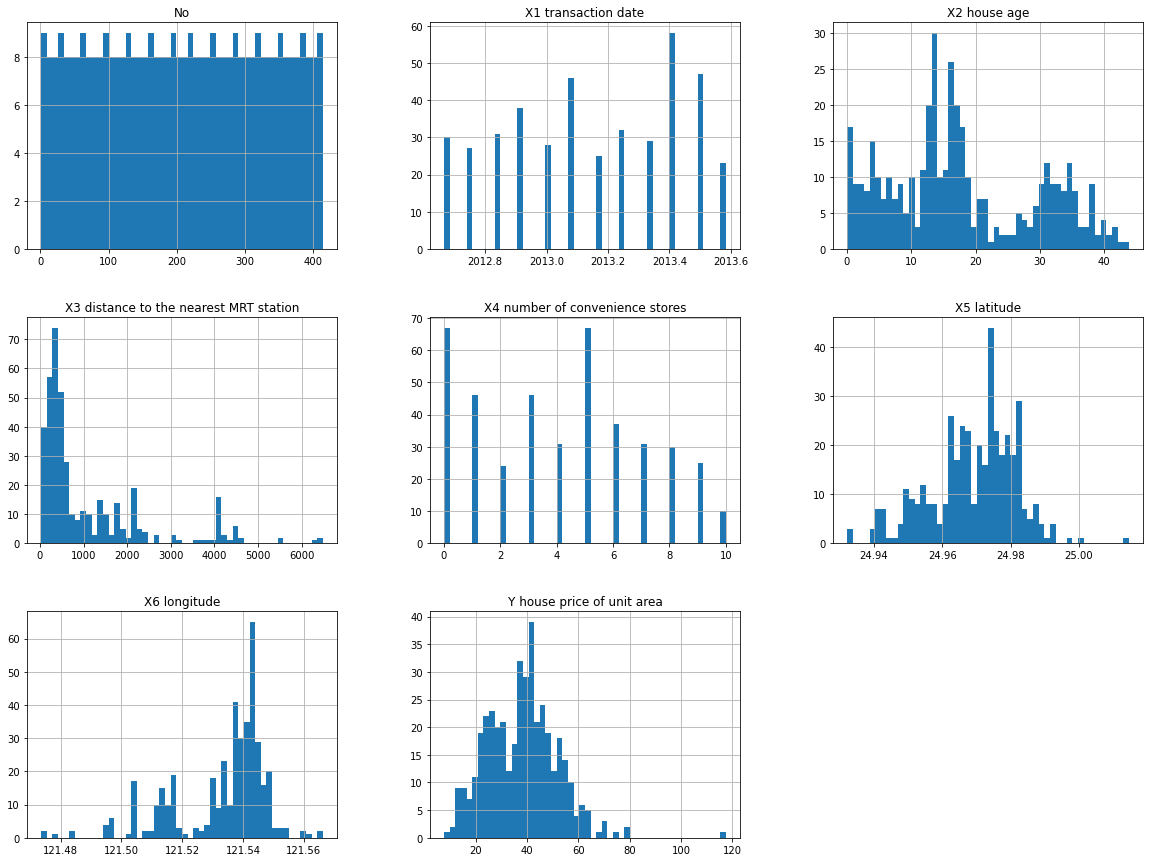

In [7]:
#plot histogram for all numerical attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
#Remove rows with missing targets
df.dropna(axis=0, subset=['Y house price of unit area'], inplace=True)
df['house_price_per_square_meter'] = df[['Y house price of unit area']].apply(lambda x: x[0] * 0.302500011, axis=1)

In [22]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,house_price_per_square_meter
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,11.464750
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,12.765500
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,14.308251
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,16.577001
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,13.037750
...,...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4,4.658500
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0,15.125001
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6,12.281500
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5,15.881251


## Split into training-test set using Stratified K-Fold Cross-Validation

In [8]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
#from sklearn import linear_model, tree, ensemble

# Remove rows with missing target values
#df.dropna(axis=0, subset=['Y house price of unit area'], inplace=True)

# Convert house prices per ping to house prices per square meter (1 ping = 3 square meters)
#df['house_price_per_square_meter'] = df[['Y house price of unit area']].apply(lambda x: x[0] * 0.302500011, axis=1)
#target = df.house_price_per_square_meter #target variable

#df.drop(['house_price_per_square_meter', 'Y house price of unit area'],axis=1,inplace=True) #creating new dataset with target variables removed

In [9]:
#df

In [10]:
#target.describe()

In [11]:
#f, axes = plt.subplots(figsize=(20,10))
#sns.distplot(target, bins=50, ax=axes)

In [12]:
# Function to carry out the Stratified K Fold Cross Validation

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

#cnt=1

# split() method to generate indices to split data into training and test set
#for train_index, test_index in kf.split(df, target):
    #print(f'Fold:{cnt}, Train Set: {len(train_index)}, Test Set: {len(test_index)}')
    #cnt += 1

In [13]:
# rmse for our evaluation metric
#def rmse(score):
    #rmse = np.sqrt(-score)
    #print(f'rmse= {"{:.2f}".format(rmse)}')

## Visualize Data

In [14]:
df_housing = df.copy()

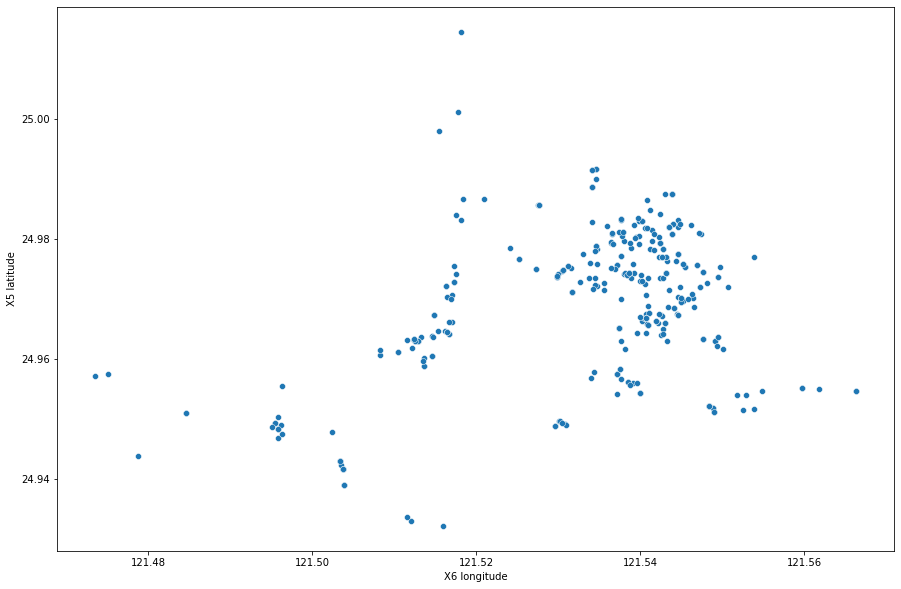

In [15]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=df_housing['X6 longitude'], y=df_housing['X5 latitude'], ax=ax)

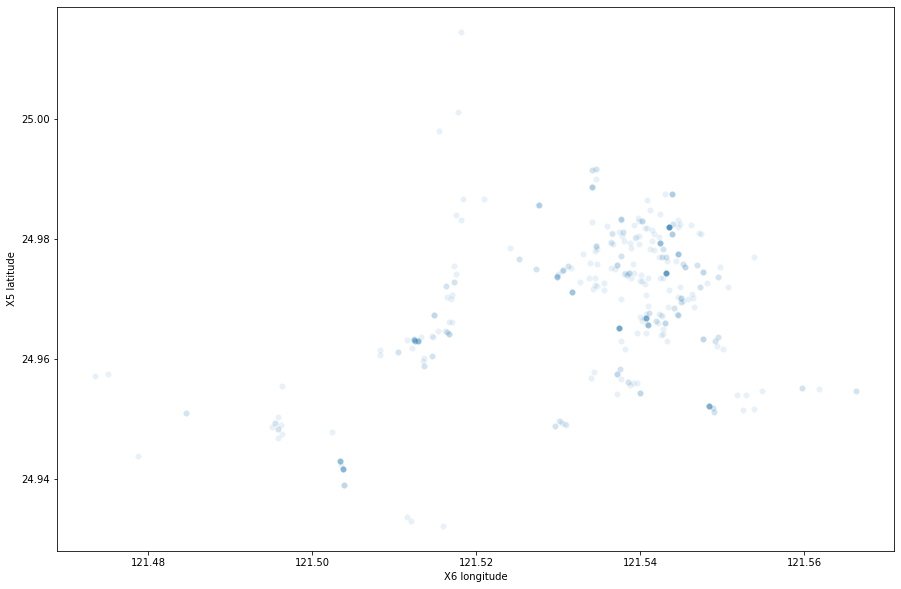

In [16]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x=df_housing['X6 longitude'], y=df_housing['X5 latitude'], ax=ax, alpha=0.1)

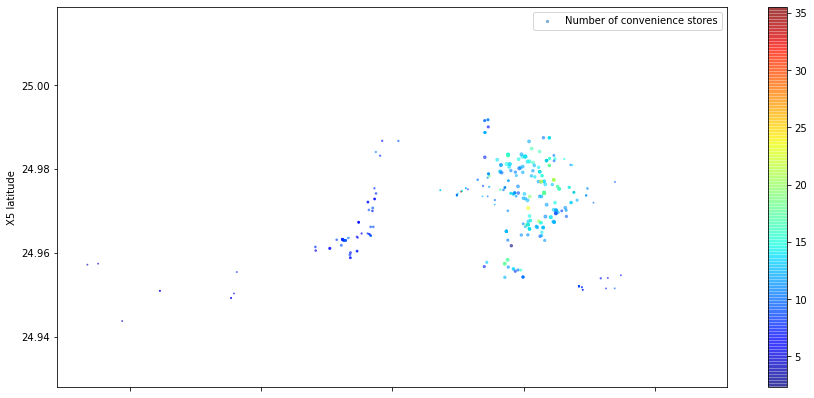

In [47]:

df_housing.plot(kind="scatter", x="X6 longitude", y="X5 latitude", alpha=0.5,
               s=df_housing['X4 number of convenience stores'], label='Number of convenience stores',
               c=df['house_price_per_square_meter'], cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,7)
               )
plt.legend()

In [35]:
df_housing

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [39]:
df_housing['house_price_per_square_meter'] = df_housing[['Y house price of unit area']].apply(lambda x: x[0] * 0.302500011, axis=1)

In [40]:
df_housing

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,house_price_per_square_meter
0,32.0,84.87882,10,24.98298,121.54024,37.9,11.464750
1,19.5,306.59470,9,24.98034,121.53951,42.2,12.765500
2,13.3,561.98450,5,24.98746,121.54391,47.3,14.308251
3,13.3,561.98450,5,24.98746,121.54391,54.8,16.577001
4,5.0,390.56840,5,24.97937,121.54245,43.1,13.037750
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,4.658500
410,5.6,90.45606,9,24.97433,121.54310,50.0,15.125001
411,18.8,390.96960,7,24.97923,121.53986,40.6,12.281500
412,8.1,104.81010,5,24.96674,121.54067,52.5,15.881251


In [41]:
df_housing.drop(['Y house price of unit area'], axis=1, inplace=True)

In [42]:
df_housing

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,house_price_per_square_meter
0,32.0,84.87882,10,24.98298,121.54024,11.464750
1,19.5,306.59470,9,24.98034,121.53951,12.765500
2,13.3,561.98450,5,24.98746,121.54391,14.308251
3,13.3,561.98450,5,24.98746,121.54391,16.577001
4,5.0,390.56840,5,24.97937,121.54245,13.037750
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,4.658500
410,5.6,90.45606,9,24.97433,121.54310,15.125001
411,18.8,390.96960,7,24.97923,121.53986,12.281500
412,8.1,104.81010,5,24.96674,121.54067,15.881251


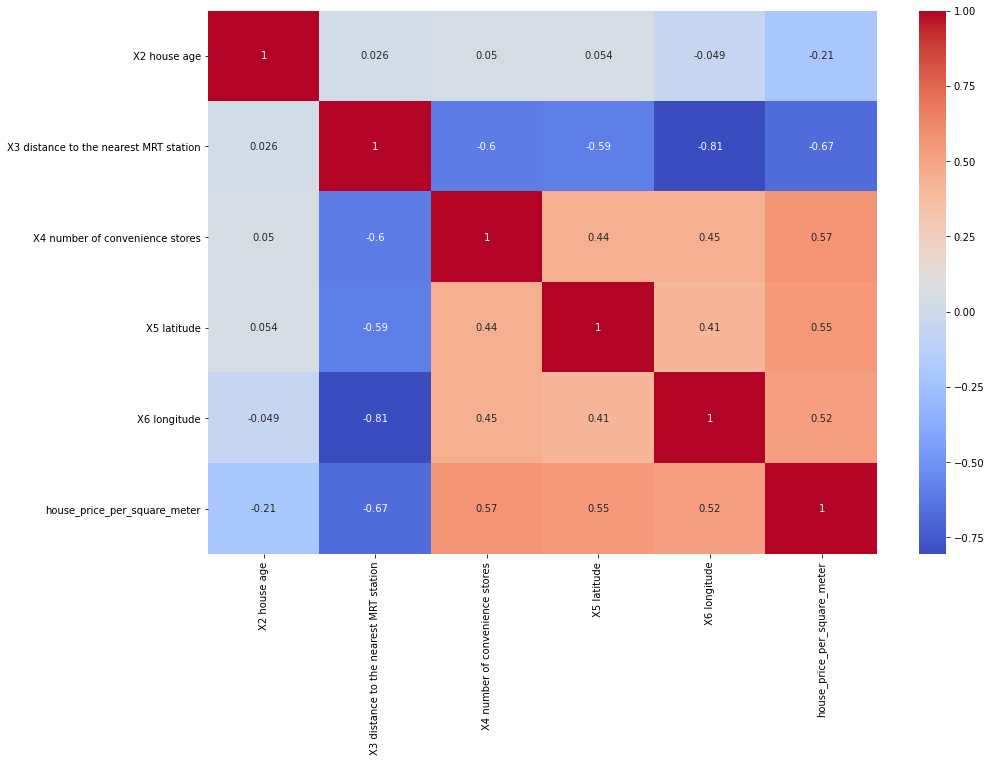

In [49]:
# Looking for correlations
corr_matrix = df_housing.corr()
f, ax= plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True,ax=ax)